# Intro to NLP (Natural Language Processing): Week 3 - Deep Dive 2

Code implementation for below topics:


1.   TF-IDF
2.   Bag-of-Words
3.   Document Similarity - Use Cases










Dataset Link: https://www.kaggle.com/snapcrack/all-the-news

Dataset Name: articles1.csv (50,000 news articles)

Dataset Description: News articles from 5 American publications

**Steps to access, download, and use the dataset:**



1.   Access the above link to kaggle, click on "Data" tab and download "articles1.csv(194.11 MB)" the dataset
2.   Once downloaded, click on the file to unzip it. 
3.   Save the file in a folder easily accessible - E.g. "Documents"
4.   Open a Google Colab Notebook
5.   In the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")
6.   You are ready to start using the data in the Colab Notebook.



Data location within Colab: '/content/articles1.csv'

Check whick folder in the Google Colab notebook we are currently in?

In [ ]:
pwd

'/content'

Now that we know which folder we are in, how do we see if the data we loaded (in step 5 above) is correctly loaded or not?

In [ ]:
ls

articles1.csv  sample_data/




---



---



## Load dataset, Exploratory Data Analysis, and Pre-Processing

### Load .csv dataset into a pandas dataframe

In [ ]:
# reading the csv into a pandas dataframe
import pandas as pd
import csv

cols=['num','id','title','publication', 'author', 'date', 'year', 'month', 'url', 'content']

news_articles_df = pd.read_csv('/content/articles1.csv', engine = 'python', usecols=cols, header=0, nrows=10000)
news_articles_df = news_articles_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

news_articles_df.columns=['num','id','title','publication', 'author', 'date', 'year', 'month', 'url', 'content']

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

# Removing empty rows from csv 
news_articles_df.dropna(axis=0, how='all',inplace=True)
nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns after removing empty rows')

news_articles_df.head()

There are 10000 rows and 10 columns
There are 10000 rows and 10 columns after removing empty rows


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


##### Removing the bad lines by checking in the column 'num' (which is just a serial number is type int or not, if not then assuming it's a bad link and removing it from df)

In [ ]:
news_articles_df = news_articles_df[pd.to_numeric(news_articles_df['num'], errors='coerce').notnull()]

nRow, nCol = news_articles_df.shape
print(f'There are {nRow} rows and {nCol} columns')

news_articles_df.head()

There are 10000 rows and 10 columns


,num,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### Describe the data

In [ ]:
#@title
# getting basic info about the dataset

news_articles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          10000 non-null  int64  
 1   id           10000 non-null  int64  
 2   title        10000 non-null  object 
 3   publication  10000 non-null  object 
 4   author       9964 non-null   object 
 5   date         10000 non-null  object 
 6   year         10000 non-null  float64
 7   month        10000 non-null  float64
 8   url          0 non-null      float64
 9   content      10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 859.4+ KB


In [ ]:
#@title
# checking for null values, if any

news_articles_df.isnull().sum()

num                0
id                 0
title              0
publication        0
author            36
date               0
year               0
month              0
url            10000
content            0
dtype: int64

### EDA of the dataset

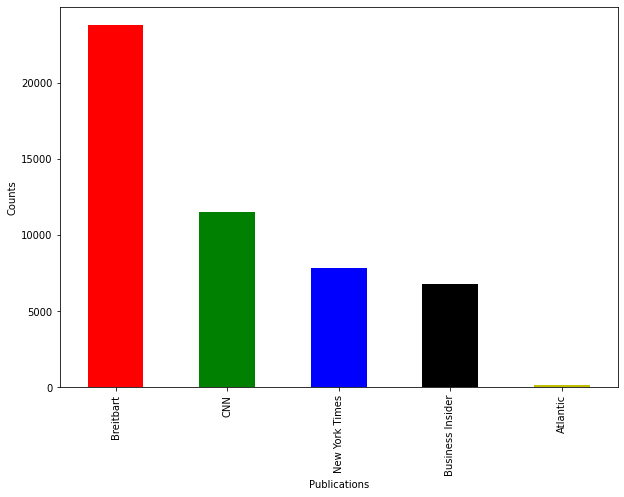

In [ ]:
# Visualization of news publications names and article count in the dataset

import matplotlib.pyplot as plt

color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,7))

plt.xlabel("Publications")
plt.ylabel("Counts")

news_articles_df.publication.value_counts().plot(kind='bar', color=color_list)

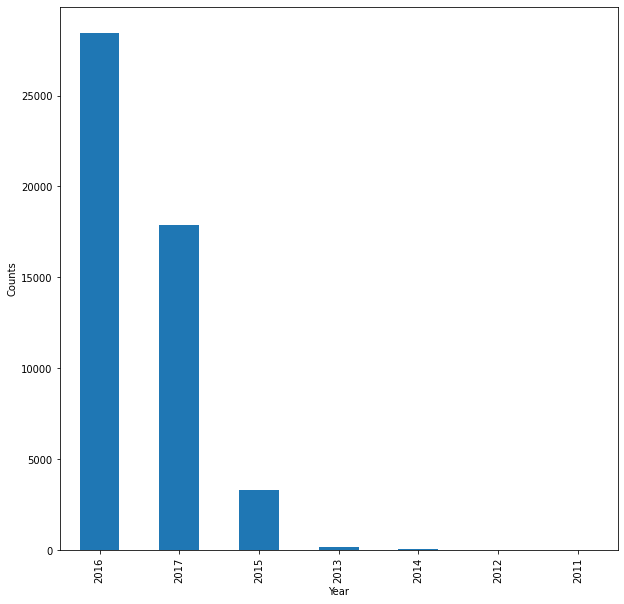

In [ ]:
# Visualization of news article count per year

news_articles_df['year'] = news_articles_df['year'].map(int).map(str)
news_articles_df['year'] = pd.to_datetime(news_articles_df['year'], format='%Y').dt.strftime('%Y')
news_articles_df = news_articles_df.sort_values(by='year')

plt.figure(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Counts")

news_articles_df.year.value_counts().plot(kind='bar')
plt.show()

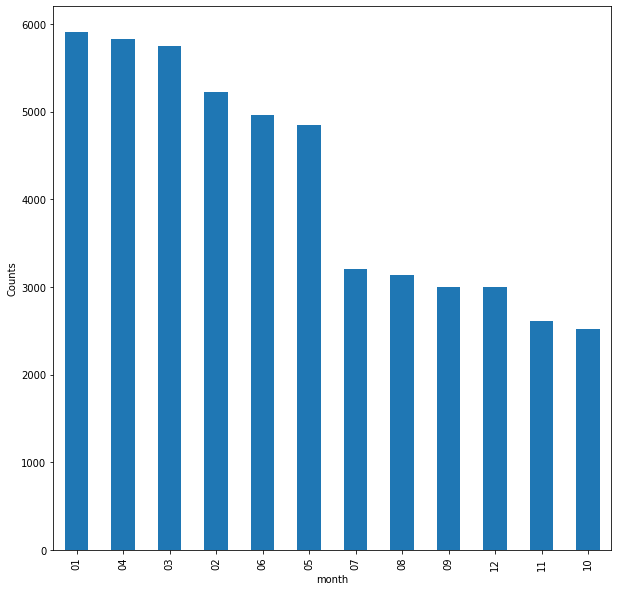

In [ ]:
# Visualization of news article count released monthly to observe if any pattern exists 

news_articles_df['month'] = news_articles_df['month'].map(int).map(str)
news_articles_df['month'] = pd.to_datetime(news_articles_df['month'], format='%m').dt.strftime('%m')
news_articles_df = news_articles_df.sort_values(by='month')

plt.figure(figsize=(10,10))
plt.xlabel("month")
plt.ylabel("Counts")

news_articles_df.month.value_counts().plot(kind='bar')
plt.show()

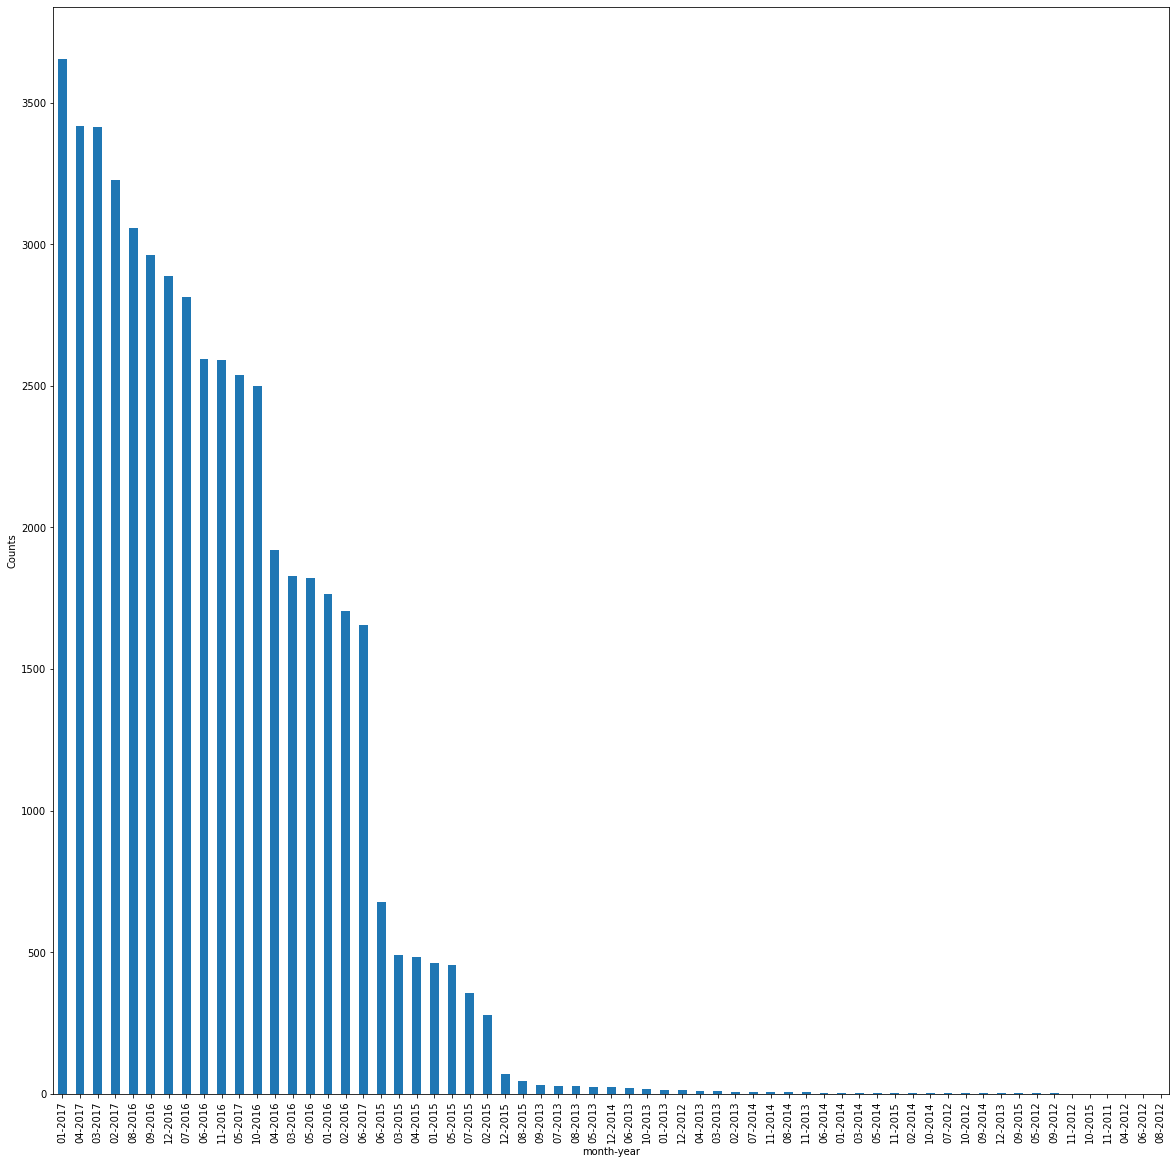

In [ ]:
# Visualization of news article count per month-year

news_articles_df['my'] = news_articles_df['month'].map(int).map(str) + '-' + news_articles_df['year'].map(int).map(str)
news_articles_df['my'] = pd.to_datetime(news_articles_df['my'], format='%m-%Y').dt.strftime('%m-%Y')
news_articles_df = news_articles_df.sort_values(by='my')

plt.figure(figsize=(20,20))
plt.xlabel("month-year")
plt.ylabel("Counts")

news_articles_df.my.value_counts().plot(kind='bar')
plt.show()

### For next phase of analysis, we will consider only the "Content" column

In [ ]:
# initializing a new dataframe with only the content column for faster operation 

content_df = news_articles_df['content']
content_df = content_df.to_frame()
content_df
#content_df.sample(10, random_state = 5)

,content
0,WASHINGTON — Congressional Republicans have...
1,"After the bullet shells get counted, the blood..."
2,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,"Death may be the great equalizer, but it isn’t..."
4,"SEOUL, South Korea — North Korea’s leader, ..."
...,...
9995,"Tuesday on MSNBC’s “For the Record with Greta,..."
9996,U. S. President Donald Trump has informed mult...
9997,Former CIA operative and 2016 presidential c...
9998,Ynetnews reports: Prime Minister Benjamin Neta...


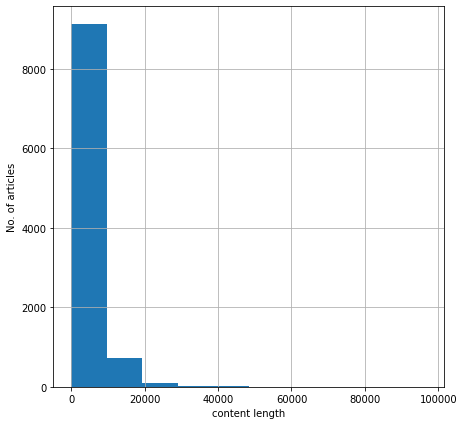

In [ ]:
# visualizing content length
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xlabel("content length")
plt.ylabel("No. of articles")

content_df['content'].str.len().hist()

### Parts of Speech (POS) Tagging

#### Import libraries

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Contraction Mapping

!pip install contractions
import contractions

     |████████████████████████████████| 245kB 17.5MB/s 
     |████████████████████████████████| 317kB 11.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81705 sha256=091658f49d8b5ed437a171c7058ae8e6afae0e9f3d9daf727d6f090c67e1d94a
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


#### Expand Contractions

In [ ]:
content_df['content'] = content_df['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
content_df.sample(10, random_state = 5)
#content_df.head()

,content
7054,"[“O., K., Craig,”, the, father, asks,, “you, r..."
442,"[On, an, October, day,, Anne, Davis,, 76,, whe..."
3954,"[Seldom, does, a, new, credit, card, go, viral..."
2288,"[Pressure, mounted, on, Tuesday, for, Fox, New..."
3196,"[ROME, —, A, homeless, man, was, detained, on,..."
6178,"[This, article, is, part, of, a, series, aimed..."
8351,"[Fresh, from, a, tour, of, ‘, zones’, across, ..."
5658,"[(Want, to, get, this, briefing, by, email?, H..."
2065,"[WASHINGTON, —, The, sudden, death, of, legisl..."
413,"[WASHINGTON, —, The, Obama, administration, ha..."


In [ ]:
#joining back the list of items into one string

content_df['content'] = [' '.join(map(str, l)) for l in content_df['content']]
content_df.sample(10, random_state = 5)

,content
7054,"“O. K. Craig,” the father asks, “you ready?” “..."
442,"On an October day, Anne Davis, 76, wheeled int..."
3954,Seldom does a new credit card go viral. There ...
2288,Pressure mounted on Tuesday for Fox News to ta...
3196,ROME — A homeless man was detained on Tuesday ...
6178,This article is part of a series aimed at help...
8351,"Fresh from a tour of ‘ zones’ across Europe, B..."
5658,(Want to get this briefing by email? Here’s th...
2065,WASHINGTON — The sudden death of legislation t...
413,WASHINGTON — The Obama administration has writ...


In [ ]:
# you can explore individual cells like this

print(content_df['content'][0])
print(type(content_df['content'][0]))

WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for and Americans, handing House Republicans a big victory on issues. But a sudden loss of the disputed subsidies could conceivably because the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been demanding an

#### Noise Cleaning

In [ ]:
# Noise Cleaning - spacing, special characters, lowercasing 

import regex as re
content_df['content'] = content_df['content'].str.lower()
content_df['content'] = content_df['content'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

content_df.sample(10, random_state = 5)

,content
7054,o k craig the father asks you ready yeah dad r...
442,on an october day anne davis 76 wheeled into h...
3954,seldom does a new credit card go viral there a...
2288,pressure mounted on tuesday for fox news to ta...
3196,rome a homeless man was detained on tuesday i...
6178,this article is part of a series aimed at help...
8351,fresh from a tour of zones across europe brei...
5658,want to get this briefing by email heres the ...
2065,washington the sudden death of legislation to...
413,washington the obama administration has writt...


Regex explanation: 

1.   [^] matches everything but everything inside the blockquotes
2.   \w matches any word character (equal to [a-zA-Z0-9_])
3.   \d matches a digit (equal to [0-9])
4.   \s matches any whitespace character (equal to [\r\n\t\f\v ])
5.   \' matches the character ' literally (case sensitive)
6.   '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [ ]:
#nltk tokenization

content_df['tokenized_content'] = content_df['content'].apply(word_tokenize)
content_df.sample(10, random_state = 5)

,content,tokenized_content
7054,o k craig the father asks you ready yeah dad r...,"[o, k, craig, the, father, asks, you, ready, y..."
442,on an october day anne davis 76 wheeled into h...,"[on, an, october, day, anne, davis, 76, wheele..."
3954,seldom does a new credit card go viral there a...,"[seldom, does, a, new, credit, card, go, viral..."
2288,pressure mounted on tuesday for fox news to ta...,"[pressure, mounted, on, tuesday, for, fox, new..."
3196,rome a homeless man was detained on tuesday i...,"[rome, a, homeless, man, was, detained, on, tu..."
6178,this article is part of a series aimed at help...,"[this, article, is, part, of, a, series, aimed..."
8351,fresh from a tour of zones across europe brei...,"[fresh, from, a, tour, of, zones, across, euro..."
5658,want to get this briefing by email heres the ...,"[want, to, get, this, briefing, by, email, her..."
2065,washington the sudden death of legislation to...,"[washington, the, sudden, death, of, legislati..."
413,washington the obama administration has writt...,"[washington, the, obama, administration, has, ..."


In [ ]:
# initializing Stop words libraries

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Visualizations

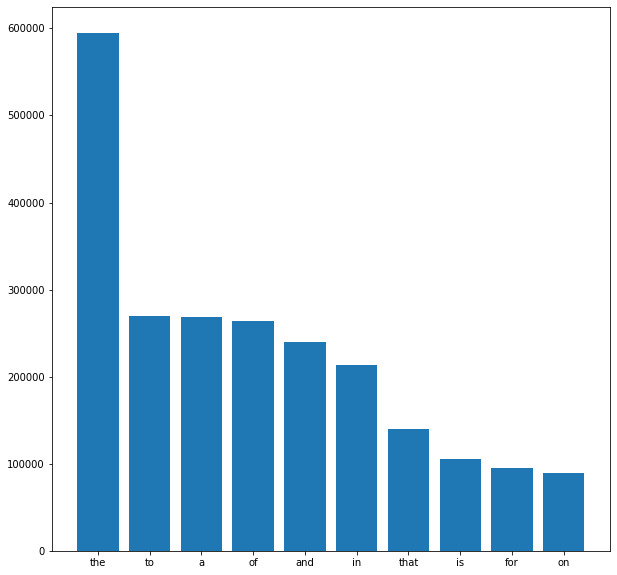

In [ ]:
# Before removing checking occurances of stopwords in article content


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(content_df['content'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


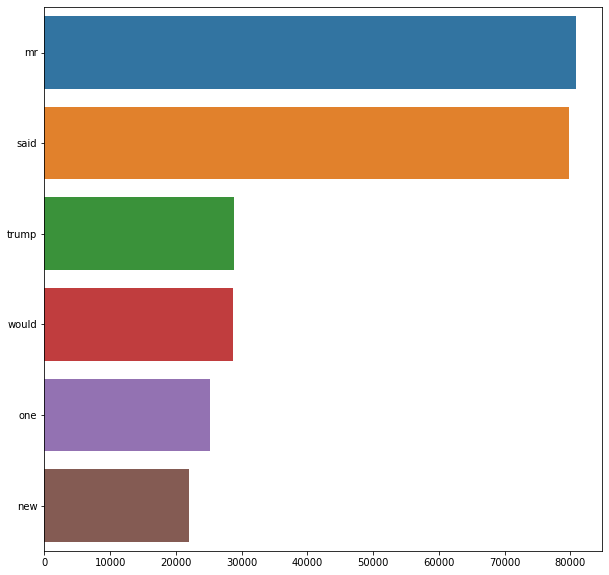

In [ ]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(content_df['content'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

#### Remove stopwords

In [ ]:
# Now we remove stopwords 

content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: [word for word in x if word not in stop_words])
content_df['tokenized_content_join'] = [' '.join(map(str, l)) for l in content_df['tokenized_content']]

content_df.sample(10, random_state = 5)

,content,tokenized_content,tokenized_content_join
7054,o k craig the father asks you ready yeah dad r...,"[k, craig, father, asks, ready, yeah, dad, rep...",k craig father asks ready yeah dad replies son...
442,on an october day anne davis 76 wheeled into h...,"[october, day, anne, davis, 76, wheeled, midto...",october day anne davis 76 wheeled midtown manh...
3954,seldom does a new credit card go viral there a...,"[seldom, new, credit, card, go, viral, unboxin...",seldom new credit card go viral unboxing video...
2288,pressure mounted on tuesday for fox news to ta...,"[pressure, mounted, tuesday, fox, news, take, ...",pressure mounted tuesday fox news take action ...
3196,rome a homeless man was detained on tuesday i...,"[rome, homeless, man, detained, tuesday, conne...",rome homeless man detained tuesday connection ...
6178,this article is part of a series aimed at help...,"[article, part, series, aimed, helping, naviga...",article part series aimed helping navigate lif...
8351,fresh from a tour of zones across europe brei...,"[fresh, tour, zones, across, europe, breitbart...",fresh tour zones across europe breitbart londo...
5658,want to get this briefing by email heres the ...,"[want, get, briefing, email, heres, good, even...",want get briefing email heres good evening her...
2065,washington the sudden death of legislation to...,"[washington, sudden, death, legislation, repea...",washington sudden death legislation repeal aff...
413,washington the obama administration has writt...,"[washington, obama, administration, written, 2...",washington obama administration written 275 br...


In [ ]:
# for sake of simplicity, showing 10 article contents based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in content_df['tokenized_content'].sample(10, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('k', 'NN'), ('craig', 'VBZ'), ('father', 'RB'), ('asks', 'JJ'), ('ready', 'JJ'), ('yeah', 'NN'), ('dad', 'NN'), ('replies', 'NNS'), ('son', 'VBP'), ('raw', 'JJ'), ('emotional', 'JJ'), ('searching', 'VBG'), ('conversation', 'NN'), ('followed', 'VBD'), ('latest', 'JJS'), ('episode', 'NN'), ('brought', 'VBD'), ('together', 'RB'), ('young', 'JJ'), ('gay', 'NNS'), ('actor', 'VBP'), ('california', 'NN'), ('supported', 'VBD'), ('hillary', 'JJ'), ('clinton', 'NN'), ('father', 'NN'), ('kentucky', 'NN'), ('backed', 'VBD'), ('donald', 'JJ'), ('j', 'NN'), ('trump', 'NN'), ('talk', 'NN'), ('length', 'NN'), ('feel', 'NN'), ('others', 'NNS'), ('votes', 'VBZ'), ('election', 'NN'), ('day', 'NN'), ('conversation', 'NN'), ('third', 'JJ'), ('final', 'JJ'), ('installment', 'NN'), ('series', 'NN'), ('dialogues', 'VBZ'), ('different', 'JJ'), ('pairs', 'NNS'), ('voters', 'NNS'), ('struggling', 'VBG'), ('feelings', 'NNS'), ('betrayal', 'JJ'), ('mystification', 'JJ'), ('fury', 'NN'), ('election', 'NN'), ('day

#### Yellow Brick: POS Visualizer

In [ ]:
# Yellow Brick is a POS visualizer - https://github.com/DistrictDataLabs/yellowbrick/blob/master/docs/api/text/postag.rst
# You may need to reload the workbook to activate it. In that case, re-run all cells again from the beginning 

!pip install -U yellowbrick

     |████████████████████████████████| 266kB 10.7MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


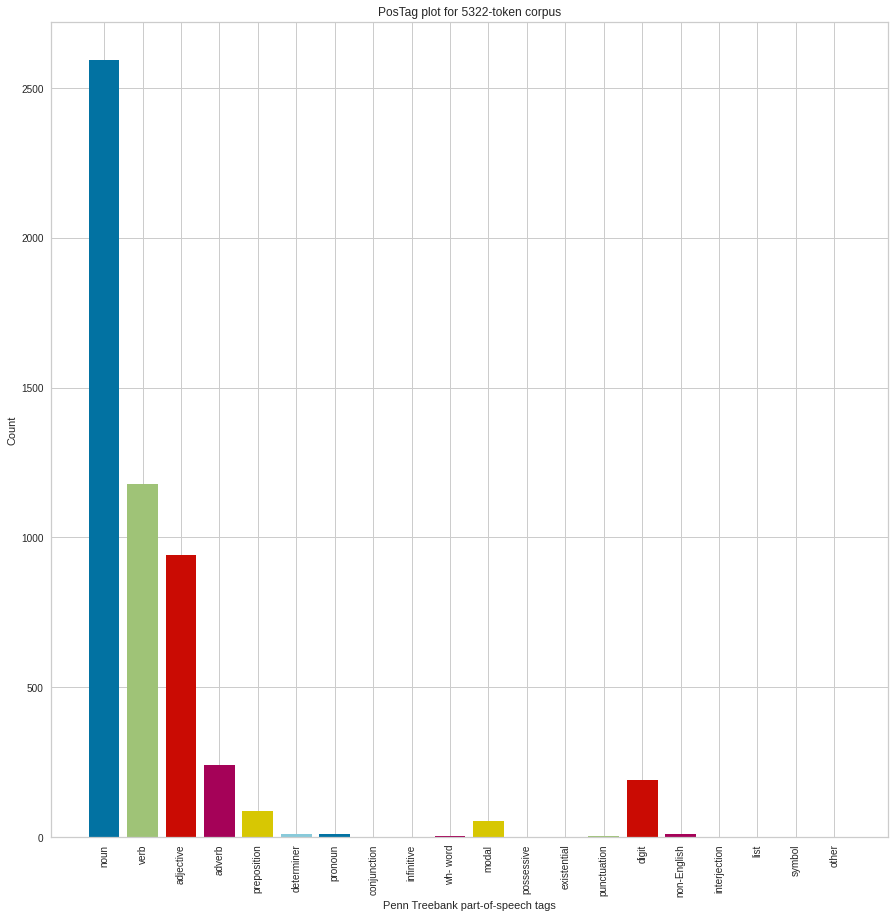

In [ ]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

Some examples of POS Tags (via Universal Tagger)

Refer: http://www.nltk.org/book/ch05.html
![tagset](https://camo.githubusercontent.com/515359c32d2839f79bc166c07ff96fb70a0f82e5/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3730302f312a62444d64712d457061417232664c544e38344c6a67672e706e67)



## TF-IDF

### **Reminder: TF-IDF stands for “Term Frequency — Inverse Data Frequency”.** 

- Term Frequency (TF): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf. 

![TF](https://cdn-media-1.freecodecamp.org/images/1*HM0Vcdrx2RApOyjp_ZeW_Q.png)


- Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below. 

![IDF](https://cdn-media-1.freecodecamp.org/images/1*A5YGwFpcTd0YTCdgoiHFUw.png)

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf: 

![TF-IDF formula](https://cdn-media-1.freecodecamp.org/images/1*nSqHXwOIJ2fa_EFLTh5KYw.png)

![formula](https://cdn-media-1.freecodecamp.org/images/1*q2tRgjV_J-MLvnhwNAl0KQ.png)

#### Let's automate this calculation process and utilize sklearn's built-in capabilities to calculate TF-IDF.

Refer to documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

Let's first take 5 random articles and obtain the matrix of TF-IDF features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
# tfidf calculation
text_content = content_df['tokenized_content_join']
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [ ]:
content_subset = text_content[0:10]
tfidf_subset = vector.fit_transform(content_subset)

In [ ]:
tfidf_subset = tfidf_subset.toarray()

vocab = vector.get_feature_names()
tfidf_df = pd.DataFrame(np.round(tfidf_subset, 2), columns=vocab)
tfidf_df

,000,100,101,1036,106,11,115,12,125,1279,13,14,146th,15,150,151st,152,157,16,17,176,18,184,1882,19,1906,191,1910,1920,1921,1923,1930s,1932,1934,1936,1937,1938,1940s,1941,1942,...,wondered,wong,wongs,wooden,woods,word,words,wore,worker,workers,workload,works,world,worlds,worried,worry,worse,worsened,worst,wounded,wrapped,write,writer,writers,wrong,yellow,yeo,yes,yielded,yoo,young,younger,youngest,yow,zaha,zaros,zero,zoraida,zoraidas,zsa
0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.01,0.00,0.0,0.01,0.00,0.02,0.01,0.01,0.00,0.00,0.00,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.02,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.0,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.01,0.0,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.02,0.04,0.02,0.02,0.05,0.02,0.02,0.02,0.02,0.04,0.00,0.04,0.04,...,0.00,0.58,0.11,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.14,0.00,0.00,0.02,0.04,0.00,0.02,0.05,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.03,0.00,0.00,0.11,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.03,0.00,0.00,0.04,0.05,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.05
4,0.00,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.05,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
8,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00

In [ ]:
tfidf_subset.shape

(10, 3789)

In [ ]:
print(vocab)

['000', '100', '101', '1036', '106', '11', '115', '12', '125', '1279', '13', '14', '146th', '15', '150', '151st', '152', '157', '16', '17', '176', '18', '184', '1882', '19', '1906', '191', '1910', '1920', '1921', '1923', '1930s', '1932', '1934', '1936', '1937', '1938', '1940s', '1941', '1942', '1946', '1949', '1951', '1952', '1955', '1960s', '1968', '1969', '1980s', '1983', '1987', '1988', '1991', '1995', '1996', '200', '2000', '2001', '2003', '2005', '2007', '2009', '2010', '2011', '2012', '2013', '2014', '2017', '20th', '21', '22', '235', '239', '24', '240', '245', '25', '255', '263', '265', '27', '275', '276', '289', '29', '295', '30', '300', '300s', '31', '32', '343', '35', '36', '360', '37', '370', '38', '40', '400', '40th', '4100', '42', '430', '444', '45', '450', '458', '46', '460', '485', '50', '52', '521', '53', '54', '550', '552', '57', '58', '600', '62', '63', '630', '64', '65', '66', '67', '68', '69', '700', '71', '72', '74', '76', '77', '770', '79', '800', '80s', '81', '83



---



---



## Bag-of-Words

![bow](http://uc-r.github.io/public/images/analytics/feature-engineering/bow-image.png)

Let's first take 5 news articles.

In [ ]:
content_df_random = content_df['tokenized_content_join'].sample(5)
content_df_random

1854    chief compliance officer corporate owner colle...
2098    first glance controversy immediate boiling out...
573     academy award nomination best original song tu...
3667    americans love pets households united states l...
9556    red cross therapist helped treat asylum seeker...
Name: tokenized_content_join, dtype: object

In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer()

In [ ]:
corpus_bow = content_df_random
X_bow = vectorizer_bow.fit_transform(corpus_bow)

In [ ]:
print(vectorizer_bow.get_feature_names())

['000', '001', '10', '12', '18', '1950s', '1980s', '2006', '2008', '2009', '2011', '2013', '2014', '2015', '23', '25', '30', '300', '310', '37', '375', '40', '41', '44', '45', '50', '60', '60s', '70s', '78', '86', '90', 'able', 'absence', 'abuse', 'academy', 'acceptable', 'access', 'according', 'accountable', 'accounting', 'accused', 'accusing', 'acronym', 'action', 'actor', 'adage', 'adapted', 'add', 'addition', 'address', 'adequate', 'administration', 'admitted', 'adopting', 'adult', 'adults', 'advantage', 'adventure', 'advertised', 'advised', 'adviser', 'affect', 'affecting', 'afghan', 'agencies', 'agency', 'agencys', 'agent', 'agents', 'agreed', 'aid', 'aim', 'airlines', 'airport', 'alessia', 'alexandra', 'allegations', 'allergic', 'allow', 'along', 'already', 'also', 'although', 'always', 'ambition', 'american', 'americans', 'amey', 'amount', 'andrews', 'angry', 'animal', 'animals', 'ankle', 'announced', 'anonymity', 'anonymous', 'another', 'antisocial', 'anyone', 'anything', 'apa

In [ ]:
print(X_bow.shape)

(5, 1124)


In [ ]:
print(X_bow.toarray())

[[2 0 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
doc_term_matrix = X_bow.todense()
doc_term_matrix

matrix([[2, 0, 1, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Now let's repeat this analysis but with a larger subset of the data.

In [ ]:
content_df_subset = content_df['tokenized_content_join']
content_df_subset[0:100]
content_df_subset.head()

0    washington congressional republicans new fear ...
1    bullet shells get counted blood dries votive c...
2    walt disneys bambi opened 1942 critics praised...
3    death may great equalizer necessarily evenhand...
4    seoul south korea north koreas leader kim said...
Name: tokenized_content_join, dtype: object

In [ ]:
corpus_bow_subset = content_df_subset
X_bow_subset = vectorizer_bow.fit_transform(corpus_bow_subset)

In [ ]:
print(vectorizer_bow.get_feature_names())

['00', '000', '0000', '0000364334', '0001', '0002', '0009', '000s', '000th', '001', '0012', '0015', '002', '0024', '0025', '003', '004', '0045', '005', '006', '007', '007s', '01', '010', '0100', '0102', '0115', '012', '0125', '0134', '014', '015', '017', '018', '02', '020', '0200', '0200gmt', '021', '0214', '022', '0230', '024', '025', '0250', '026', '027', '028', '03', '030', '0305', '031', '032', '034', '0345', '036', '038', '039', '04', '040', '0400', '0415hrs', '042', '043', '045', '046', '049', '05', '050', '050th', '051', '053', '054', '055', '056', '057', '058', '06', '060', '061', '063', '064', '065', '066', '067', '068', '07', '070', '071', '072', '074', '075', '077', '078', '08', '0800', '081', '082', '083', '085', '087', '089', '09', '090', '091', '0915', '0920', '093', '0935', '095', '0950', '097', '098', '0n', '0s', '10', '100', '1000', '1000000', '1000s', '1001', '1002', '1003', '1004', '1005', '1007', '10086', '10087', '100c', '100g', '100k', '100s', '100th', '100x', '10

In [ ]:
print(X_bow_subset.shape)

(10000, 107294)


In [ ]:
print(X_bow_subset.toarray())

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
vectorizer_bow_subset_2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_bow_subset_2 = vectorizer_bow_subset_2.fit_transform(corpus_bow_subset)

In [ ]:
print(vectorizer_bow_subset_2.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(X_bow_subset_2.toarray())



---



---



## Document Similarity - Use Cases



1.   Euclidean Distance
2.   Cosine Similarity
3.   Jaccard Similarity
4.   Document Clustering
5.   Topic Models



#### Euclidean Distance

![euclidean](https://miro.medium.com/max/1200/0*Bd8VtxN8ql4qw4vo)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
tfidf_subset

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00758635, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01273124, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0476756 , 0.01668421, 0.        , ..., 0.01121658, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03407725],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16402919,
        0.        ]])

In [ ]:
euclidean_content = euclidean_distances(tfidf_subset, tfidf_subset)
euclidean_content

array([[0.        , 1.39909028, 1.4073867 , 1.40185268, 1.40044475,
        1.41252555, 1.38035527, 1.39741519, 1.40522284, 1.41114671],
       [1.39909028, 0.        , 1.39376582, 1.39411566, 1.40506159,
        1.40428294, 1.40087219, 1.3960415 , 1.40580449, 1.37832462],
       [1.4073867 , 1.39376582, 0.        , 1.37242807, 1.40649149,
        1.41098267, 1.39119034, 1.40293725, 1.38646843, 1.38280082],
       [1.40185268, 1.39411566, 1.37242807, 0.        , 1.40501745,
        1.40775511, 1.40504726, 1.39820145, 1.37400719, 1.39482729],
       [1.40044475, 1.40506159, 1.40649149, 1.40501745, 0.        ,
        1.40841915, 1.38915673, 1.40435047, 1.41371415, 1.41321952],
       [1.41252555, 1.40428294, 1.41098267, 1.40775511, 1.40841915,
        0.        , 1.41256266, 1.41103316, 1.41095989, 1.41259573],
       [1.38035527, 1.40087219, 1.39119034, 1.40504726, 1.38915673,
        1.41256266, 0.        , 1.40565461, 1.41041006, 1.41330213],
       [1.39741519, 1.3960415 , 1.4029372



---


#### Cosine Similarity

![cosine](https://miro.medium.com/max/1330/0*m9saft_JcVwPE-hS)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_content = cosine_similarity(tfidf_subset, tfidf_subset)
cosine_content

array([[1.00000000e+00, 2.12731888e-02, 9.63133387e-03, 1.74045323e-02,
        1.93772532e-02, 2.38577847e-03, 4.73096590e-02, 2.36153933e-02,
        1.26743912e-02, 4.33248181e-03],
       [2.12731888e-02, 1.00000000e+00, 2.87084247e-02, 2.82207563e-02,
        1.29009576e-02, 1.39947085e-02, 1.87785514e-02, 2.55340591e-02,
        1.18568714e-02, 5.01106151e-02],
       [9.63133387e-03, 2.87084247e-02, 1.00000000e+00, 5.82205976e-02,
        1.08908429e-02, 4.56395274e-03, 3.22947175e-02, 1.58835332e-02,
        3.88526519e-02, 4.39309496e-02],
       [1.74045323e-02, 2.82207563e-02, 5.82205976e-02, 1.00000000e+00,
        1.29629877e-02, 9.11277184e-03, 1.29210939e-02, 2.25163458e-02,
        5.60521177e-02, 2.72284187e-02],
       [1.93772532e-02, 1.29009576e-02, 1.08908429e-02, 1.29629877e-02,
        1.00000000e+00, 8.17775382e-03, 3.51217908e-02, 1.38998779e-02,
        7.06148875e-04, 1.40529086e-03],
       [2.38577847e-03, 1.39947085e-02, 4.56395274e-03, 9.11277184e-03,
   



---



#### Jaccard Similarity

![jaccard](https://miro.medium.com/max/1330/0*rkv5DNFg3EVatxVl)

In [ ]:
from sklearn.metrics import jaccard_similarity_score, jaccard_score, pairwise_distances

##### Let's take two subsets of articles (and their tokenized content), where the subsets perhaps have some similarity or overlap in information. 

In [ ]:
jaccard_la = content_df[content_df['tokenized_content_join'].str.contains('los angeles')]
jaccard_la = jaccard_la['tokenized_content_join']
jaccard_la

2       walt disneys bambi opened 1942 critics praised...
8       hillary kerr founder digital media company los...
44      los angeles girding four years potential battl...
84      first episode one day time netflixs reboot nor...
86      condé nast publications might sitting gold min...
                              ...                        
9883    hillary clinton compared dc comics superhero w...
9899    celebrities took social media accounts weekend...
9916    suspicious package lying third rail metro red ...
9924    disruptions caused protesters los angeles inte...
9988    wideners reloading shooting supply reports amm...
Name: tokenized_content_join, Length: 771, dtype: object

In [ ]:
jaccard_ca = content_df[content_df['tokenized_content_join'].str.contains('california')]
jaccard_ca = jaccard_ca['tokenized_content_join']
jaccard_ca_shortened = jaccard_ca[0:771]
jaccard_ca_shortened

2       walt disneys bambi opened 1942 critics praised...
8       hillary kerr founder digital media company los...
10      donald j trump take control white house would ...
11      thompsons tex one promising troubled technolog...
16      pages journal found dylann roofs car assertion...
                              ...                        
5651    donald j trump erased enormous disadvantage hi...
5655    fall 2012 shane tusup asked become involved ka...
5666    donald j trump may rail wall street business e...
5672    six minutes one second took 66 years khizr kha...
5675    top 10 comments week digital platforms selecte...
Name: tokenized_content_join, Length: 771, dtype: object

In [ ]:
jaccard_content = jaccard_score(jaccard_la, jaccard_ca_shortened, average='micro')
jaccard_content

0.0012987012987012987

##### Now let's take another two subsets that may potentially be similar. 

In [ ]:
jaccard_nyc = content_df[content_df['tokenized_content_join'].str.contains('new york city')]
jaccard_nyc = jaccard_nyc['tokenized_content_join']
jaccard_nyc_shortened = jaccard_nyc[0:476]
jaccard_nyc_shortened

1       bullet shells get counted blood dries votive c...
12      west palm beach fla donald j trump rang new ye...
15      finally second avenue subway opened new york c...
36      basement mammoth old building upper manhattan ...
38      2007 rey canunayon wife marygwen immigrated un...
                              ...                        
6795    brief statement week still mysterious murders ...
6798    miami beach michal keren david stood alone ami...
6802    want get briefing email heres good evening her...
6838    lawrenceburg ind donnie gaddis picked wrong co...
6842    remnants hurricane hermine swept along eastern...
Name: tokenized_content_join, Length: 476, dtype: object

In [ ]:
jaccard_brooklyn = content_df[content_df['tokenized_content_join'].str.contains('brooklyn')]
jaccard_brooklyn = jaccard_brooklyn['tokenized_content_join']
jaccard_brooklyn

1       bullet shells get counted blood dries votive c...
15      finally second avenue subway opened new york c...
30      year winding new years resolutions around corn...
36      basement mammoth old building upper manhattan ...
37      writers different rest us castoff scraps worth...
                              ...                        
8968    failed presidential candidate hillary clinton ...
8972    mondays breitbart news daily pamela geller pre...
9026    new york mayor bill de blasio forced share may...
9704    considering times live maybe good idea preside...
9878    new york afp five tombstones overturned histor...
Name: tokenized_content_join, Length: 476, dtype: object

In [ ]:
jaccard_content = jaccard_score(jaccard_nyc_shortened, jaccard_brooklyn, average='micro')
jaccard_content

0.002105263157894737



---



#### Document Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(cosine_content, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,3,1.33228,2
1,1,9,1.34383,2
2,0,6,1.34767,2
3,8,10,1.35284,3
4,4,12,1.38539,3
5,7,11,1.40255,3
6,5,15,1.42123,4
7,13,16,1.44069,7
8,14,17,1.47373,10


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

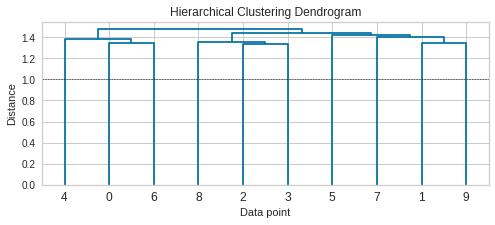

In [ ]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([content_df, cluster_labels], axis=1)

,content,tokenized_content,tokenized_content_join,ClusterLabel
0,washington congressional republicans have a n...,"[washington, congressional, republicans, new, ...",washington congressional republicans new fear ...,1.0
1,after the bullet shells get counted the blood ...,"[bullet, shells, get, counted, blood, dries, v...",bullet shells get counted blood dries votive c...,7.0
2,when walt disneys bambi opened in 1942 critics...,"[walt, disneys, bambi, opened, 1942, critics, ...",walt disneys bambi opened 1942 critics praised...,4.0
3,death may be the great equalizer but it is not...,"[death, may, great, equalizer, necessarily, ev...",death may great equalizer necessarily evenhand...,5.0
4,seoul south korea north koreas leader kim sai...,"[seoul, south, korea, north, koreas, leader, k...",seoul south korea north koreas leader kim said...,3.0
...,...,...,...,...
9995,tuesday on msnbcs for the record with greta wh...,"[tuesday, msnbcs, record, greta, discussing, t...",tuesday msnbcs record greta discussing todays ...,NaN
9996,you s president donald trump has informed mult...,"[president, donald, trump, informed, multiple,...",president donald trump informed multiple indiv...,NaN
9997,former cia operative and 2016 presidential can...,"[former, cia, operative, 2016, presidential, c...",former cia operative 2016 presidential candida...,NaN
9998,ynetnews reports prime minister benjamin netan...,"[ynetnews, reports, prime, minister, benjamin,...",ynetnews reports prime minister benjamin netan...,NaN




---



#### Topic Models

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda = LatentDirichletAllocation(max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(X_bow)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10'])
features

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,0.000147,0.000147,0.000147,0.000147,0.998673,0.000147,0.000147,0.000147,0.000147,0.000147
1,0.000239,0.000239,0.995221,0.000239,0.002869,0.000239,0.000239,0.000239,0.000239,0.000239
2,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.000318,0.997134
3,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.000476,0.995714,0.000476,0.000476
4,0.000505,0.000505,0.000505,0.000505,0.000505,0.000505,0.995454,0.000505,0.000505,0.000505


In [ ]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[]

[]

[('difficulty', 11.100001284213455), ('coordination', 9.0916497928582), ('civilian', 8.099999962199101), ('continues', 7.099999961921623), ('believe', 6.099999961547243), ('athletes', 6.097898988141298), ('april', 5.099999961014595), ('ashes', 5.099999961014595), ('baseball', 5.099999961014595), ('21', 4.099999960196841), ('aggressive', 4.099999960196841), ('dispersed', 3.100000219999203), ('bedford', 3.1000002161613662), ('cuban', 3.1000002161613662), ('cops', 3.100000015523343), ('68', 3.0999999587832385), ('ages', 3.0999999587832385), ('andy', 3.0999999587832385), ('arrival', 3.0999999587832385), ('canagliflozin', 3.0999999587832385), ('citys', 3.0999999587832385), ('claimed', 3.0999999587832385), ('detectives', 3.0999999587832385), ('biology', 3.0990927043635197), ('danny', 3.0977473025316793), ('detained', 2.1000000757097808), ('data', 2.1000000738328453), ('1938', 2.099999955762596), ('2001', 2.099999955762596), ('20th', 2.099999955762596), ('24', 2.099999955762596), ('29

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([content_df, cluster_labels], axis=1)

,content,tokenized_content,tokenized_content_join,ClusterLabel
0,washington congressional republicans have a n...,"[washington, congressional, republicans, new, ...",washington congressional republicans new fear ...,1.0
1,after the bullet shells get counted the blood ...,"[bullet, shells, get, counted, blood, dries, v...",bullet shells get counted blood dries votive c...,0.0
2,when walt disneys bambi opened in 1942 critics...,"[walt, disneys, bambi, opened, 1942, critics, ...",walt disneys bambi opened 1942 critics praised...,2.0
3,death may be the great equalizer but it is not...,"[death, may, great, equalizer, necessarily, ev...",death may great equalizer necessarily evenhand...,0.0
4,seoul south korea north koreas leader kim sai...,"[seoul, south, korea, north, koreas, leader, k...",seoul south korea north koreas leader kim said...,0.0
...,...,...,...,...
9995,tuesday on msnbcs for the record with greta wh...,"[tuesday, msnbcs, record, greta, discussing, t...",tuesday msnbcs record greta discussing todays ...,NaN
9996,you s president donald trump has informed mult...,"[president, donald, trump, informed, multiple,...",president donald trump informed multiple indiv...,NaN
9997,former cia operative and 2016 presidential can...,"[former, cia, operative, 2016, presidential, c...",former cia operative 2016 presidential candida...,NaN
9998,ynetnews reports prime minister benjamin netan...,"[ynetnews, reports, prime, minister, benjamin,...",ynetnews reports prime minister benjamin netan...,NaN




---



---



## References & Further Reading:

1.   https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
2.   https://machinelearningmastery.com/gentle-introduction-bag-words-model/
3.   https://www.geeksforgeeks.org/feature-extraction-techniques-nlp/
4.   https://towardsdatascience.com/3-basic-distance-measurement-in-text-mining-5852becff1d7
5.   https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089





---



---

